In [41]:
%run tools.py
from matplotlib import pyplot
import matplotlib

In [2]:
def pca(geno, chrom, dataset, populations, prune=True, scaler=None):
    if prune is True:
        geno = geno.to_n_alt()
        gn = ld_prune(geno, size=500, step=200,threshold=0.2)
    else:
        gn = geno.to_n_alt()
        
    coords1, model1 = allel.pca(gn, n_components=10, scaler=scaler)
    
    fig_pca(coords1, model1, f"PCA-{dataset}", f"../../results/variants/PCA-{dataset}", sample_population=populations)

def plot_pca_coords(coords, model, pc1, pc2, ax, sample_population):
        sns.despine(ax=ax, offset=5)
        x = coords[:, pc1]
        y = coords[:, pc2]
        for pop in populations:
            flt = (sample_population == pop)
            ax.plot(x[flt], y[flt], marker='o', linestyle=' ', color=pop_colours[pop], 
                    label=pop, markersize=6, mec='k', mew=.5)
        ax.set_xlabel('PC%s (%.1f%%)' % (pc1+1, model.explained_variance_ratio_[pc1]*100))
        ax.set_ylabel('PC%s (%.1f%%)' % (pc2+1, model.explained_variance_ratio_[pc2]*100))

def fig_pca(coords, model, title,path, sample_population=None):
        if sample_population is None:
            sample_population = samples.population.values
        # plot coords for PCs 1 vs 2, 3 vs 4
        fig = plt.figure(figsize=(10, 5))
        ax = fig.add_subplot(1, 2, 1)
        plot_pca_coords(coords, model, 0, 1, ax, sample_population)
        ax = fig.add_subplot(1, 2, 2)
        plot_pca_coords(coords, model, 2, 3, ax, sample_population)
        ax.legend(bbox_to_anchor=(1, 1))
        fig.suptitle(title, y=1.02)
        
        fig.savefig(path, bbox_inches='tight', dpi=300)

In [3]:
def get_colour_dict(populations, palette="Set1"):

    cmap = plt.get_cmap(palette, len(np.unique(populations)))    # PiYG

    colors = []
    for i in range(cmap.N):
        rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
        colors.append(matplotlib.colors.rgb2hex(rgb))

    pop_colours = {A: B for A, B in zip(np.unique(populations), colors)}
    return(pop_colours)

In [20]:
chrom="1"
chroms=['1','2','3']
dataset="Aedes_angola"

In [7]:
path = f"../../results/variants/annot.variants.{chrom}.vcf.gz"
#function to read in vcfs and associated SNP data
vcf, geno, acsubpops, pos, depth, snpeff, subpops, populations =  readAndFilterVcf(path=path, 
                                                           chrom=chrom, 
                                                           qualflt=30,
                                                        missingfltprop=0.999,
                                                           plot=False)


-------------- Reading VCF for chromosome 1 --------------
{'FenAngola': [0, 7, 10], 'NewOrleans': [1, 8, 11], 'ContAngola': [2, 4, 5], 'Rockefeller': [3, 6, 9]} 

------- Filtering VCF at QUAL=30 and missingness proportion of 0.999 -------
After QUAL filter, 568812 SNPs retained out of 743586 for chromosome 1
After missingness filter, 236487 SNPs retained out of 568812 for chromosome 1


In [8]:
pop_colours = get_colour_dict(populations, "viridis")
pop_colours

{'ContAngola': '#440154',
 'FenAngola': '#31688e',
 'NewOrleans': '#35b779',
 'Rockefeller': '#fde725'}

iteration 1 retaining 7389 removing 229098 variants


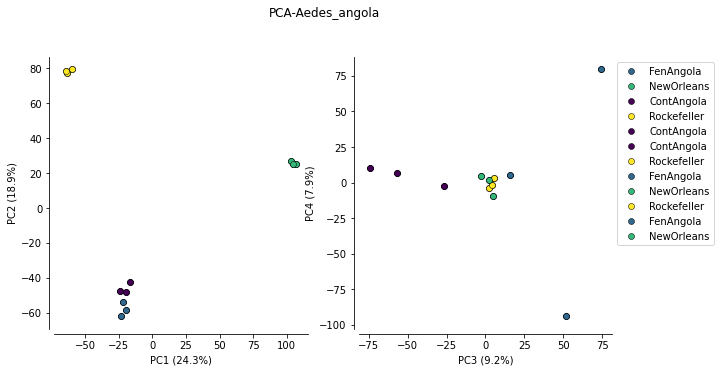

In [9]:
pca(geno ,chrom, dataset, populations, prune=True, scaler=None)

What about plotting density across the chromosome?

In [25]:
pos

0,1,2,3,4,...,313619,313620,313621,313622,313623
46,755,1565,2436,3595,...,310810892,310811300,310811363,310811414,310811539


In [32]:
!pigz -d ../../results/variants/annot.variants.3.vcf.gz

----Missingness filter 0.6--------

-------------- Reading VCF for chromosome 1 --------------
{'FenAngola': [0, 7, 10], 'NewOrleans': [1, 8, 11], 'ContAngola': [2, 4, 5], 'Rockefeller': [3, 6, 9]} 

------- Filtering VCF at QUAL=100 and missingness proportion of 0.99 -------
After QUAL filter, 347471 SNPs retained out of 743586 for chromosome 1
After missingness filter, 195139 SNPs retained out of 347471 for chromosome 1
----Missingness filter 0.6--------

-------------- Reading VCF for chromosome 2 --------------
{'FenAngola': [0, 7, 10], 'NewOrleans': [1, 8, 11], 'ContAngola': [2, 4, 5], 'Rockefeller': [3, 6, 9]} 

------- Filtering VCF at QUAL=100 and missingness proportion of 0.99 -------
After QUAL filter, 545078 SNPs retained out of 1165366 for chromosome 2
After missingness filter, 308331 SNPs retained out of 545078 for chromosome 2
----Missingness filter 0.6--------

-------------- Reading VCF for chromosome 3 --------------
{'FenAngola': [0, 7, 10], 'NewOrleans': [1, 8, 11], 

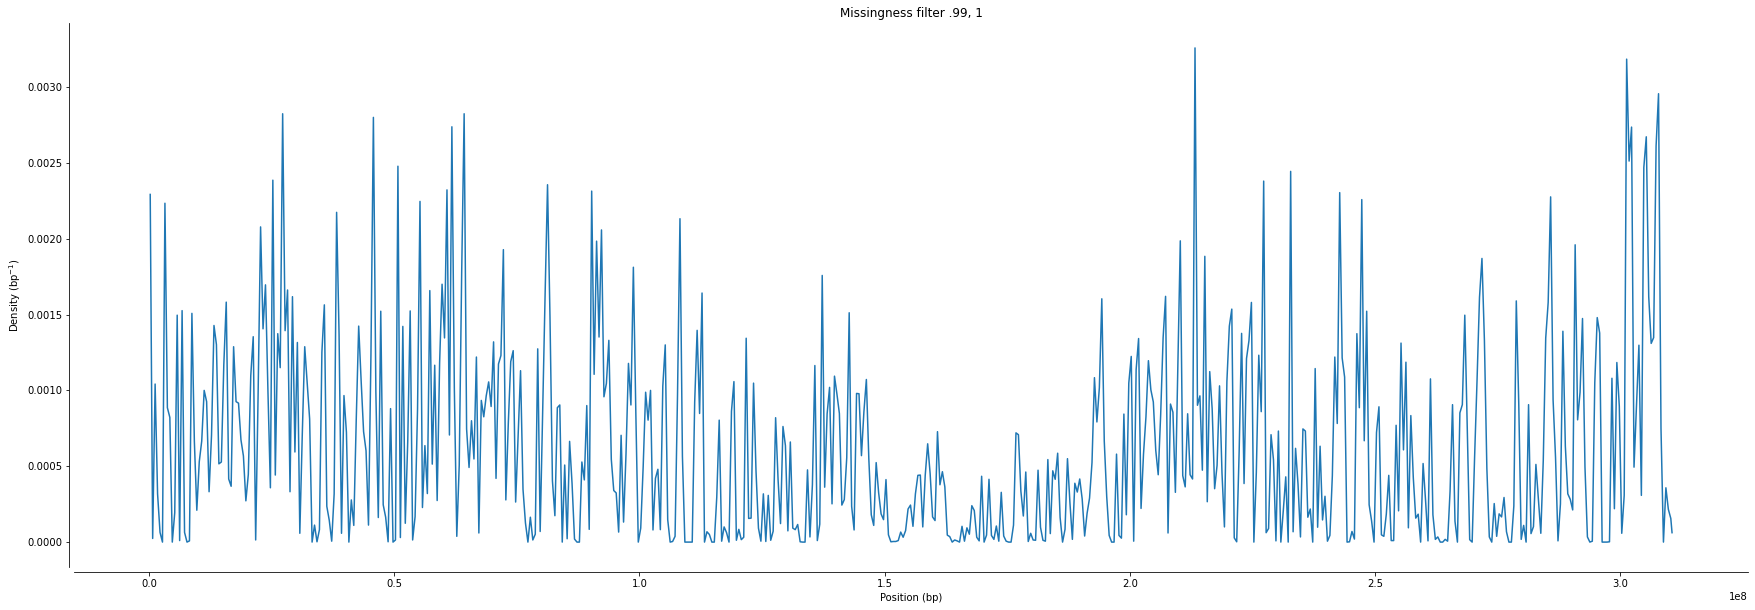

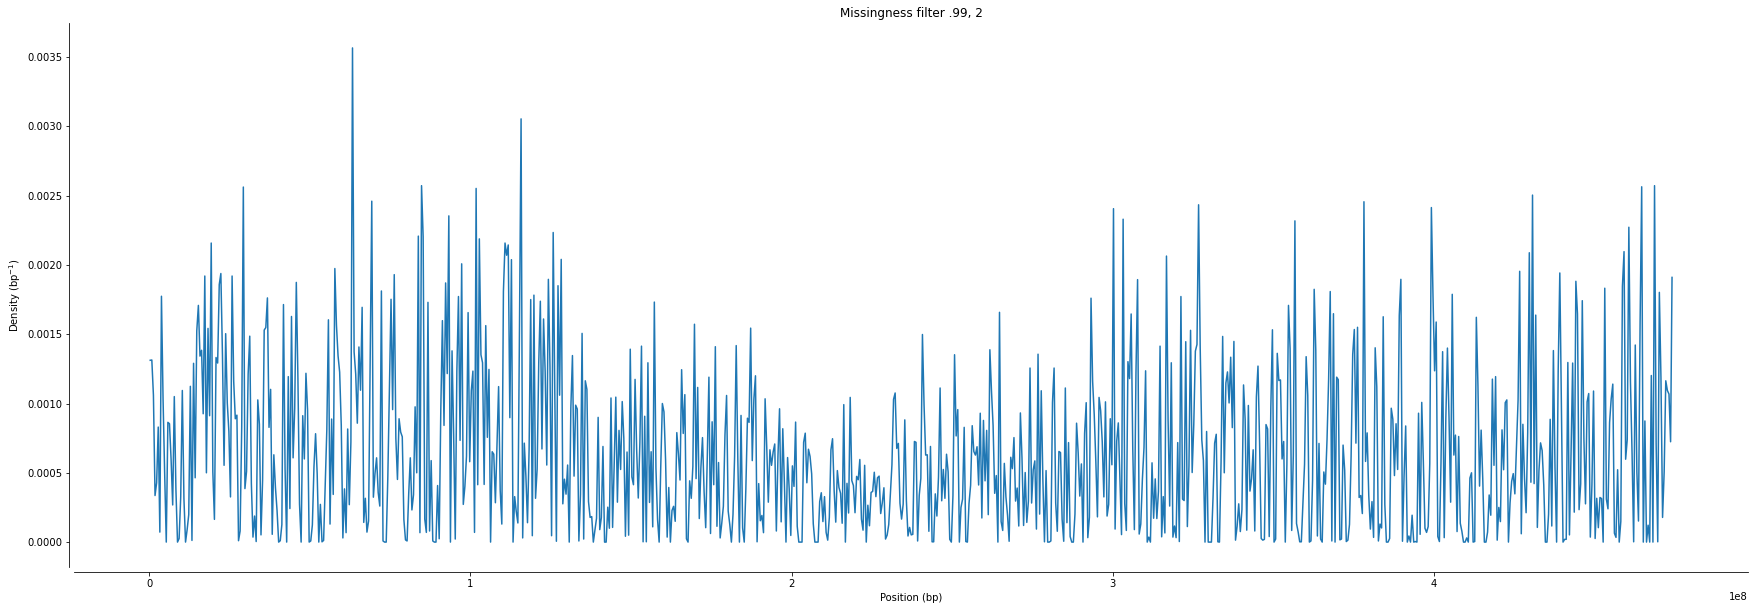

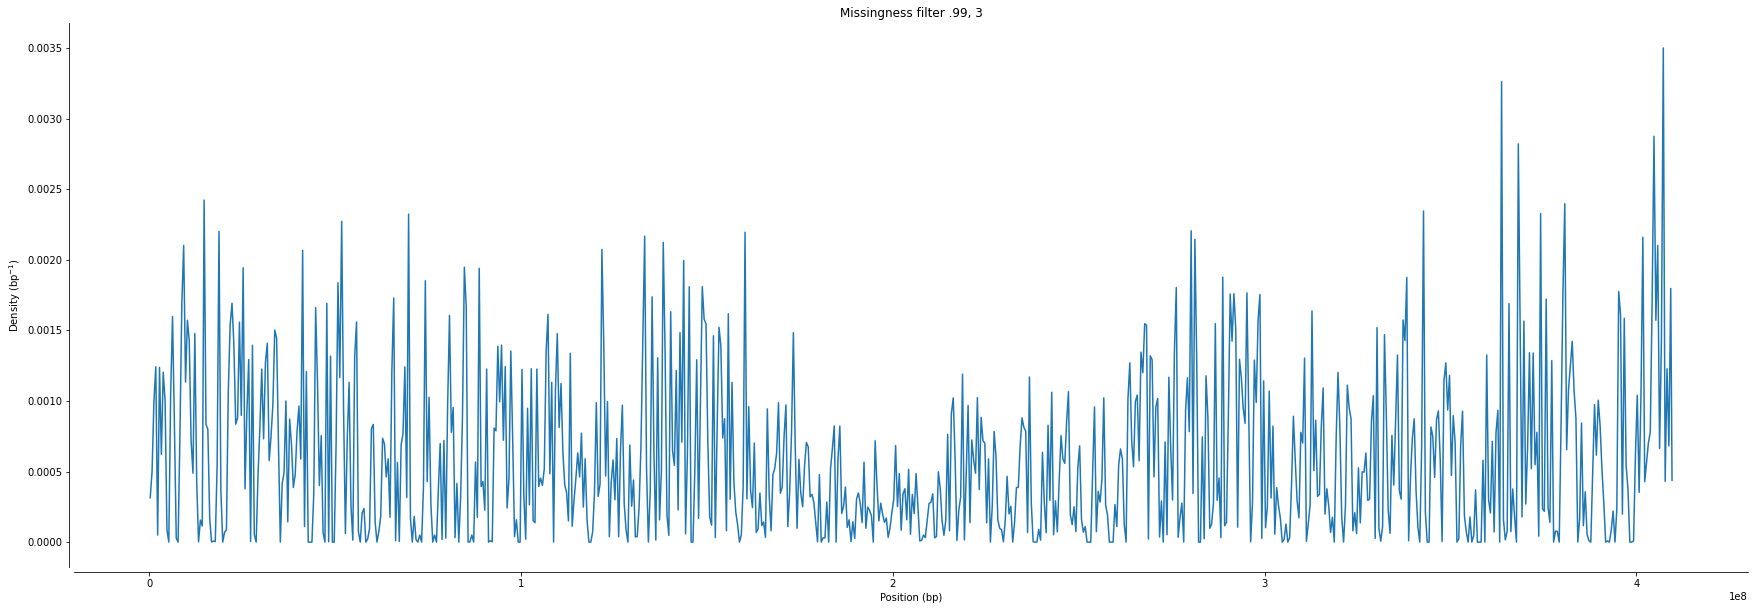

In [43]:
for chrom in chroms:
    path = f"../../results/variants/annot.variants.{chrom}.vcf"
    #function to read in vcfs and associated SNP data
    print(f"----Missingness filter {m}--------")
    vcf, geno, acsubpops, pos, depth, snpeff, subpops, populations =  readAndFilterVcf(path=path, 
                                                       chrom=chrom, 
                                                       qualflt=100,
                                                    missingfltprop=.99,
                                                       plot=False)

    plot_density(pos, 500000, f"Missingness filter .99, {chrom}")